In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob 
import os, sys

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip


--2022-08-09 09:55:38--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  1.16MB/s    in 6m 33s  

2022-08-09 10:02:12 (1.08 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [5]:
!ls

Food-5K.zip  sample_data


In [3]:
!unzip -n Food-5K.zip

Streaming output truncated to the last 5000 lines.
  inflating: Food-5K/training/0_1237.jpg  
  inflating: Food-5K/training/1_1223.jpg  
  inflating: Food-5K/training/1_1237.jpg  
  inflating: Food-5K/training/0_1223.jpg  
  inflating: Food-5K/training/1_349.jpg  
  inflating: Food-5K/training/1_70.jpg  
  inflating: Food-5K/training/1_64.jpg  
  inflating: Food-5K/training/0_628.jpg  
  inflating: Food-5K/training/0_166.jpg  
  inflating: Food-5K/training/1_375.jpg  
  inflating: Food-5K/training/1_413.jpg  
  inflating: Food-5K/training/0_600.jpg  
  inflating: Food-5K/training/1_407.jpg  
  inflating: Food-5K/training/0_614.jpg  
  inflating: Food-5K/training/1_58.jpg  
  inflating: Food-5K/training/0_172.jpg  
  inflating: Food-5K/training/1_361.jpg  
  inflating: Food-5K/training/0_199.jpg  
  inflating: Food-5K/training/0_1009.jpg  
  inflating: Food-5K/training/0_827.jpg  
  inflating: Food-5K/training/0_9.jpg  
  inflating: Food-5K/training/0_833.jpg  
  inflating: Food-5K/trai

In [10]:
!ls Food-5K/training

0_0.jpg     0_1387.jpg	0_422.jpg  0_809.jpg   1_1195.jpg  1_230.jpg  1_617.jpg
0_1000.jpg  0_1388.jpg	0_423.jpg  0_80.jpg    1_1196.jpg  1_231.jpg  1_618.jpg
0_1001.jpg  0_1389.jpg	0_424.jpg  0_810.jpg   1_1197.jpg  1_232.jpg  1_619.jpg
0_1002.jpg  0_138.jpg	0_425.jpg  0_811.jpg   1_1198.jpg  1_233.jpg  1_61.jpg
0_1003.jpg  0_1390.jpg	0_426.jpg  0_812.jpg   1_1199.jpg  1_234.jpg  1_620.jpg
0_1004.jpg  0_1391.jpg	0_427.jpg  0_813.jpg   1_119.jpg   1_235.jpg  1_621.jpg
0_1005.jpg  0_1392.jpg	0_428.jpg  0_814.jpg   1_11.jpg    1_236.jpg  1_622.jpg
0_1006.jpg  0_1393.jpg	0_429.jpg  0_815.jpg   1_1200.jpg  1_237.jpg  1_623.jpg
0_1007.jpg  0_1394.jpg	0_42.jpg   0_816.jpg   1_1201.jpg  1_238.jpg  1_624.jpg
0_1008.jpg  0_1395.jpg	0_430.jpg  0_817.jpg   1_1202.jpg  1_239.jpg  1_625.jpg
0_1009.jpg  0_1396.jpg	0_431.jpg  0_818.jpg   1_1203.jpg  1_23.jpg   1_626.jpg
0_100.jpg   0_1397.jpg	0_432.jpg  0_819.jpg   1_1204.jpg  1_240.jpg  1_627.jpg
0_1010.jpg  0_1398.jpg	0_433.jpg  0_81.jpg    1_1205.j

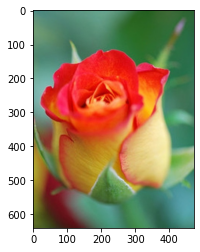

In [11]:
plt.imshow(image.load_img('Food-5K/training/0_808.jpg'))

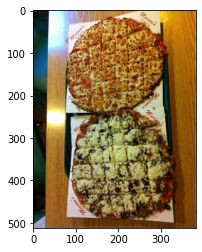

In [12]:
plt.imshow(image.load_img('Food-5K/training/1_616.jpg'))

In [4]:
!mkdir data/train/food
!mkdir data/test/food
!mkdir data/test/nonfood
!mkdir data/train/nonfood

mkdir: cannot create directory ‘data/train/food’: No such file or directory
mkdir: cannot create directory ‘data/test/food’: No such file or directory
mkdir: cannot create directory ‘data/test/nonfood’: No such file or directory
mkdir: cannot create directory ‘data/train/nonfood’: No such file or directory


In [17]:
!ls

data  Food-5K  Food-5K.zip  __MACOSX  sample_data


In [5]:
!mkdir data

In [6]:
!mkdir data/train
!mkdir data/test

In [7]:
!mkdir data/train/food
!mkdir data/train/nonfood
!mkdir data/test/food
!mkdir data/test/nonfood

In [8]:
!mv Food-5K/training/1*.jpg data/train/food
!mv Food-5K/training/0*.jpg data/train/nonfood
!mv Food-5K/validation/1*.jpg data/test/food
!mv Food-5K/validation/0*.jpg data/test/nonfood

In [20]:
!ls data/train/food

1_0.jpg     1_1194.jpg	1_1388.jpg  1_230.jpg  1_424.jpg  1_618.jpg  1_811.jpg
1_1000.jpg  1_1195.jpg	1_1389.jpg  1_231.jpg  1_425.jpg  1_619.jpg  1_812.jpg
1_1001.jpg  1_1196.jpg	1_138.jpg   1_232.jpg  1_426.jpg  1_61.jpg   1_813.jpg
1_1002.jpg  1_1197.jpg	1_1390.jpg  1_233.jpg  1_427.jpg  1_620.jpg  1_814.jpg
1_1003.jpg  1_1198.jpg	1_1391.jpg  1_234.jpg  1_428.jpg  1_621.jpg  1_815.jpg
1_1004.jpg  1_1199.jpg	1_1392.jpg  1_235.jpg  1_429.jpg  1_622.jpg  1_816.jpg
1_1005.jpg  1_119.jpg	1_1393.jpg  1_236.jpg  1_42.jpg   1_623.jpg  1_817.jpg
1_1006.jpg  1_11.jpg	1_1394.jpg  1_237.jpg  1_430.jpg  1_624.jpg  1_818.jpg
1_1007.jpg  1_1200.jpg	1_1395.jpg  1_238.jpg  1_431.jpg  1_625.jpg  1_819.jpg
1_1008.jpg  1_1201.jpg	1_1396.jpg  1_239.jpg  1_432.jpg  1_626.jpg  1_81.jpg
1_1009.jpg  1_1202.jpg	1_1397.jpg  1_23.jpg   1_433.jpg  1_627.jpg  1_820.jpg
1_100.jpg   1_1203.jpg	1_1398.jpg  1_240.jpg  1_434.jpg  1_628.jpg  1_821.jpg
1_1010.jpg  1_1204.jpg	1_1399.jpg  1_241.jpg  1_435.jpg  1_629.jpg  

In [9]:
train_path = 'data/train'
test_path = 'data/test'

In [10]:
image_files = glob(train_path + '/*/*.jpg')
valid_files = glob(test_path + '/*/*.jpg')

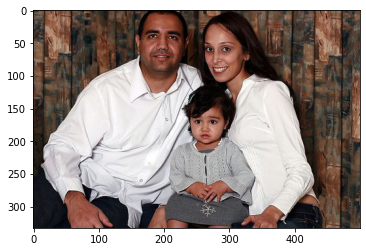

In [30]:
plt.imshow(image.load_img(np.random.choice(image_files)))

In [11]:
IMAGE_SIZE = [200, 200]

In [12]:
ptm = PretrainedModel(
    input_shape = IMAGE_SIZE + [3],
    weights = 'imagenet',
    include_top = False
)

58900480/58889256 [==============================] - 1s 0us/step


In [13]:
ptm.trainable = False

In [14]:
folders = glob(train_path+'/*')
len(folders)

2

In [15]:
K = len(folders)
x = Flatten()(ptm.output)
x =  Dense(K, activation='softmax')(x)

In [16]:
model = Model(inputs = ptm.input, outputs = x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [17]:
gen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    preprocessing_function = preprocess_input
)

In [18]:
batch_size = 128
train_generator = gen.flow_from_directory(
    train_path,
    shuffle = True,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
)

valid_generator = gen.flow_from_directory(
    test_path,
    target_size  =IMAGE_SIZE,
    batch_size = batch_size,
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
np.ceil(len(image_files)/batch_size)

24.0

In [26]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [27]:
r = model.fit(
    train_generator,
    validation_data = valid_generator,
    epochs = 10,
    steps_per_epoch = int(np.ceil(len(image_files)/batch_size)),
    validation_steps = int(np.ceil(len(valid_files)/batch_size)),
)

Epoch 1/10
24/24 [==============================] - 91s 3s/step - loss: 1.2210 - accuracy: 0.9373 - val_loss: 0.8474 - val_accuracy: 0.9580
Epoch 2/10
24/24 [==============================] - 56s 2s/step - loss: 0.3957 - accuracy: 0.9770 - val_loss: 0.7228 - val_accuracy: 0.9740
Epoch 3/10
24/24 [==============================] - 57s 2s/step - loss: 0.3880 - accuracy: 0.9797 - val_loss: 0.7602 - val_accuracy: 0.9680
Epoch 4/10
24/24 [==============================] - 56s 2s/step - loss: 0.2329 - accuracy: 0.9850 - val_loss: 0.5628 - val_accuracy: 0.9750
Epoch 5/10
24/24 [==============================] - 56s 2s/step - loss: 0.2067 - accuracy: 0.9887 - val_loss: 1.0373 - val_accuracy: 0.9670
Epoch 6/10
24/24 [==============================] - 56s 2s/step - loss: 0.1555 - accuracy: 0.9877 - val_loss: 1.0746 - val_accuracy: 0.9660
Epoch 7/10
24/24 [==============================] - 57s 2s/step - loss: 0.2438 - accuracy: 0.9887 - val_loss: 0.8598 - val_accuracy: 0.9720
Epoch 8/10
24/24 [==

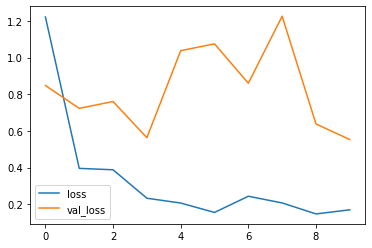

In [28]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

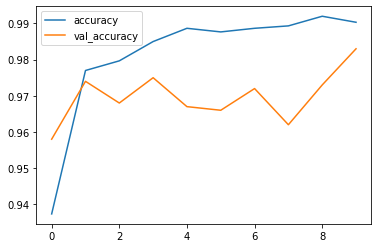

In [29]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()